<a href="https://colab.research.google.com/github/Emmanuelyeku/Emmanuelyeku/blob/main/Understanding_the_dynamics_of_football_team_strength_and_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
df.head(5)

,Name,Overall,Potential,Positions_Played,Best_Position,Nationality,Age,Height(in cm),Weight(in kg),Club_Name,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Reflexes
0,L. Messi,91,91,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,...,44,40,93,94,75,96,20,35,24,8
1,K. Benzema,91,91,"CF,ST",CF,France,34,185,81,Real Madrid CF,...,63,39,92,89,84,90,43,24,18,7
2,R. Lewandowski,91,91,ST,ST,Poland,33,185,81,FC Barcelona,...,81,49,94,81,90,88,35,42,19,10
3,K. De Bruyne,91,91,"CM,CAM",CM,Belgium,31,181,70,Manchester City,...,75,66,88,94,83,89,68,65,53,13
4,K. Mbappé,91,95,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,...,64,38,92,83,80,88,26,34,32,6


In [ ]:
# Drop rows with missing values
df.dropna(subset=['Age'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Split the data into input features (X) and output variable (y)
X = df.drop('Overall', axis=1)
y = df['Overall']

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the random forest model and fit to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importances from the model
feature_importances = rf.feature_importances_

In [ ]:
# Create a DataFrame for the importances and sort by importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Display the top 10 features
print(features_df.head(10))

            Feature  Importance
34        Reactions    0.688344
1         Potential    0.129050
18  Dribbling_Total    0.041265
19  Defending_Total    0.027931
5               Age    0.021464
16   Shooting_Total    0.014050
48  Standing_Tackle    0.007632
21         Crossing    0.007389
17    Passing_Total    0.005441
30      BallControl    0.004475


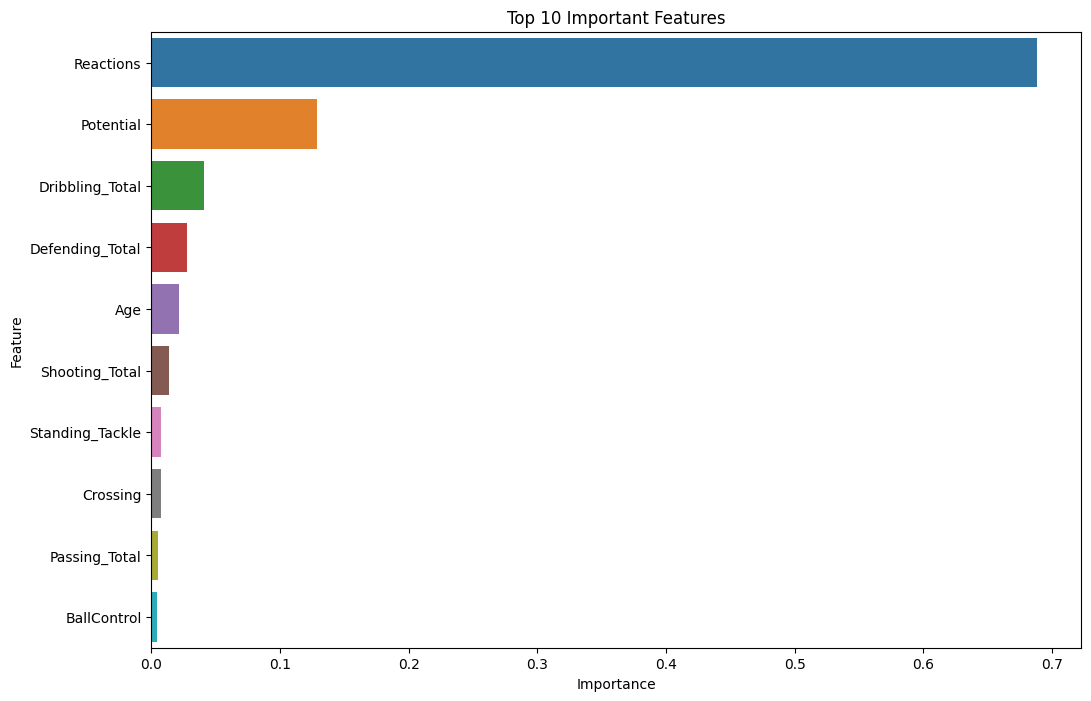

In [ ]:
# Visualize the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(data=features_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
# Group by team and calculate average scores for physical attributes and overall rating
team_strengths = df.groupby("Club_Name")[['Strength', 'Stamina', 'Sprint_Speed', 'Acceleration', 'Agility', 'Overall']].mean()

# Using multiple regression, let's predict 'Overall' (proxy for performance) using physical attributes
X = team_strengths[['Strength', 'Stamina', 'Sprint_Speed', 'Acceleration', 'Agility']]
y = team_strengths['Overall']

In [ ]:
# Add constant
X = sm.add_constant(X)

# Create model
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     25.34
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.18e-23
Time:                        09:55:39   Log-Likelihood:                -1648.0
No. Observations:                 658   AIC:                             3308.
Df Residuals:                     652   BIC:                             3335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.9821      2.999     13.664   

In [ ]:
df.columns

Index(['Name', 'Overall', 'Potential', 'Positions_Played', 'Best_Position',
       'Nationality', 'Age', 'Height(in cm)', 'Weight(in kg)', 'Club_Name',
       'Preferred_Foot', 'Weak_Foot_Rating', 'Skill_Moves',
       'International_Reputation', 'Attacking_Work_Rate',
       'Defensive_Work_Rate', 'Pace_Total', 'Shooting_Total', 'Passing_Total',
       'Dribbling_Total', 'Defending_Total', 'Physicality_Total', 'Crossing',
       'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick_Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle',
       'Goalkeeper_Reflexes'],
      dtype='object')

In [ ]:
#Hypothesis testing
# Selecting independent variables
independent_vars = ['Potential', 'Positions_Played', 'Best_Position',
       'Nationality', 'Age', 'Height(in cm)', 'Weight(in kg)', 'Club_Name',
       'Preferred_Foot', 'Weak_Foot_Rating', 'Skill_Moves',
       'International_Reputation', 'Attacking_Work_Rate',
       'Defensive_Work_Rate', 'Pace_Total', 'Shooting_Total', 'Passing_Total',
       'Dribbling_Total', 'Defending_Total', 'Physicality_Total', 'Crossing',
       'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick_Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle',
       'Goalkeeper_Reflexes']
X = df[independent_vars]

In [ ]:
# Adding a constant to the model (intercept)
X = sm.add_constant(X)

In [ ]:
# Dependent variable
y = df['Overall']

In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [ ]:
# Print the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1827.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:55:39   Log-Likelihood:                -18088.
No. Observations:               10212   AIC:                         3.628e+04
Df Residuals:                   10161   BIC:                         3.665e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
#Using Random Forest to test the hypothesis
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
independent_vars = ['Potential', 'Positions_Played', 'Best_Position',
       'Nationality', 'Age', 'Height(in cm)', 'Weight(in kg)', 'Club_Name',
       'Preferred_Foot', 'Weak_Foot_Rating', 'Skill_Moves',
       'International_Reputation', 'Attacking_Work_Rate',
       'Defensive_Work_Rate', 'Pace_Total', 'Shooting_Total', 'Passing_Total',
       'Dribbling_Total', 'Defending_Total', 'Physicality_Total', 'Crossing',
       'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick_Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle',
       'Goalkeeper_Reflexes']
X = df[independent_vars]
y = df['Overall']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
y_pred

array([78.61, 75.53, 70.06, ..., 68.15, 74.49, 69.65])

In [ ]:
# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.8092001574163243


In [ ]:
# Display feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

                     Feature  Importance
33                 Reactions    0.688371
0                  Potential    0.129093
17           Dribbling_Total    0.041277
18           Defending_Total    0.027959
4                        Age    0.021534
15            Shooting_Total    0.014136
47           Standing_Tackle    0.007691
20                  Crossing    0.007476
16             Passing_Total    0.005447
29               BallControl    0.004540
19         Physicality_Total    0.004247
48            Sliding_Tackle    0.003998
42               Positioning    0.002924
37                   Stamina    0.002322
23             Short_Passing    0.002130
45                 Composure    0.002086
11  International_Reputation    0.001736
14                Pace_Total    0.001702
31              Sprint_Speed    0.001670
25                 Dribbling    0.001654
40                Aggression    0.001539
22          Heading_Accuracy    0.001536
41             Interceptions    0.001469
46              

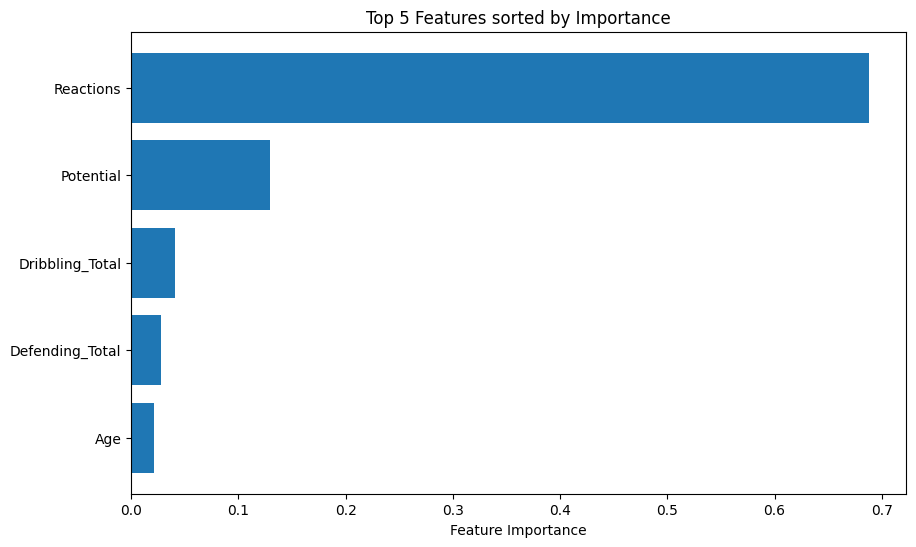

In [ ]:
# Sort by importance in descending order and get first 5
top_5_importances = importances.sort_values(by='Importance', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_5_importances['Feature'], top_5_importances['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.title('Top 5 Features sorted by Importance')
plt.gca().invert_yaxis()  # This line is to make sure the most important feature is at the top
plt.show()

In [ ]:
#Using Lasso Regression (L1 Regularization)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data, which is important for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Use Lasso Regression
alpha_value = 0.1  # You might want to fine-tune this using cross-validation
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
# Get the coefficients
coefficients = lasso.coef_
print("Lasso Coefficients:", coefficients)

Lasso Coefficients: [ 2.42956222 -0.         -0.         -0.          1.25909944  0.
  0.         -0.         -0.         -0.          0.          0.34414331
 -0.         -0.          0.2378355   0.          0.34961505  0.29288883
  0.06771909  0.44420296  0.         -0.          0.09098411  0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          1.31186847 -0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.14647952  0.          0.
  0.          0.        ]


In [ ]:
# Features with non-zero coefficients
selected_features = np.array(X.columns)[coefficients != 0]
print("Selected Features by Lasso:", selected_features)

Selected Features by Lasso: ['Potential' 'Age' 'International_Reputation' 'Pace_Total' 'Passing_Total'
 'Dribbling_Total' 'Defending_Total' 'Physicality_Total'
 'Heading_Accuracy' 'Reactions' 'Composure']
